In this project i create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease.I will use different layers and other hyperparameters for building, training and testing this classifictaion model.I will be using tensorflow and keras for this project.

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


First i will mount our google drive on colab so that i can use the dataset directly from my drive. For this i first need to upload the data on my drive and then mount the drive on colab.

In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 160930-artificial-intelligence-template-16x9.gslides   haarcascade_frontalface_default.xml
'1691524302813 (1).jpg'				        images.png
'1691524302813 (2).jpg'				        IMG-20200302-WA0008.jpg
 1691524302813.jpg				        IMG_20220228_094021_190.jpg
 20200304_214504.jpg				        IMG_20220228_094045_719.jpg
 20200304_214507.jpg				        inception.h5
 20200304_214544.jpg				        initials.jpg
 20200304_215318.jpg				       'Innovation Team.ipynb'
 20200304_215323.jpg				        ML5G-PS-005_train.csv
 20200304_215331.jpg				       'My Drive'
 20200304_215342.jpg				        my-yolo-project
 20200304_215351.jpg				       'New Doc 2022-06-08 (1).pdf'
 20200304_215401.jpg				       'New Doc 2022-06-08.pdf'
 20200304_215410.jpg				        object_tracking3.zip
 20200304_215420.jpg				        Plant_Disease
 20200304_215430.jpg				        Screenshot_20200308-005748.png
 20200304_215441.jpg				        Screenshot_20221020-081109.png
 aaaaaaa.docx					        Screenshot_20221020-081141.pn

After mounting my drive i will locate the folder where my data is stored to use it in my colab notebook.
Here you can see that I have many files include plant_disease with  contains the images that i will work on.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

Next i will import all the required libraries. As i am making a CNN model i will import all the required layers, activations, optimizers, etc.  

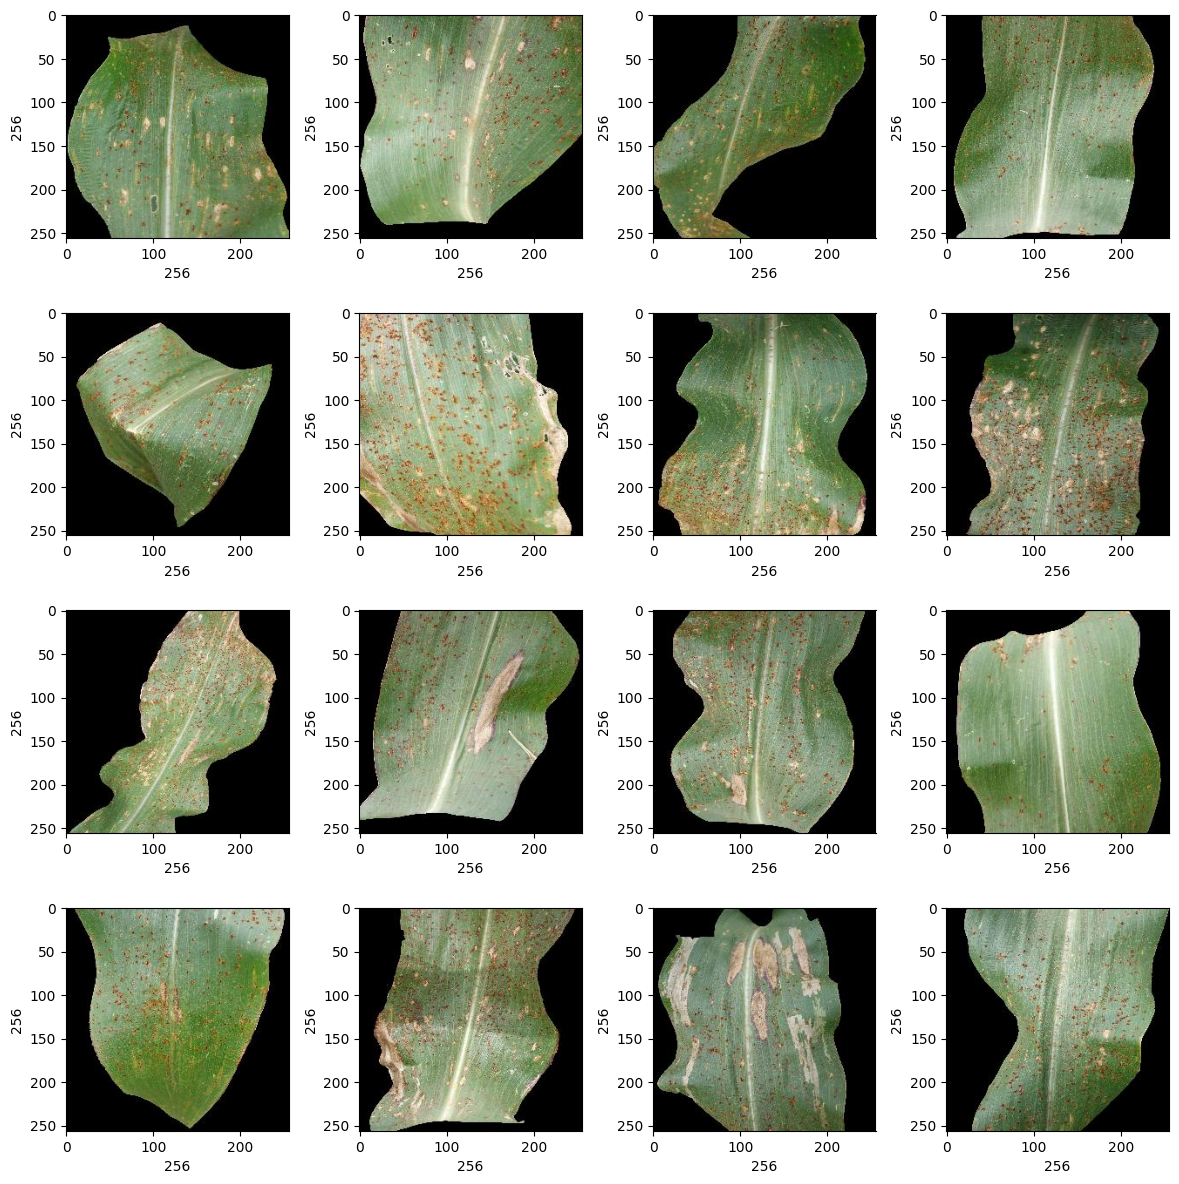

In [8]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_Disease/Data/Corn_(maize)___Common_rust_"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Now i will observe some of the images that are their in my dataset. I will plot 12 images here using the matplotlib library.

In [9]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

After visualizing the images let me move forward and create a function which will convert the images into a numpy array. It is required because i will normalize our dataset after this.

In [10]:
dir = "/content/drive/MyDrive/Plant_Disease/Data"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Now i will convert all the images into numpy array.

In [11]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

I will also observe the number of images under different classes to see if the dataset is balanced or not

In [12]:
image_list[0].shape

(256, 256, 3)

Next we i observe the shape of the image.

In [13]:
label_list = np.array(label_list)
label_list.shape

(900,)

Checking the total number of the images which is the length of the labels list.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

Next i will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [15]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

Now i will normalize the dataset of my images. As pixel values ranges from 0 to 255 so i will divide each image pixel with 255 to normalize the dataset.

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

Next i will create a network architecture for the model. I have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

While compiling the model i need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [19]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Next i will split the dataset into validation and training data.

In [20]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 15s 471ms/step - loss: 1.0646 - accuracy: 0.3333 - val_loss: 1.0898 - val_accuracy: 0.3125
Epoch 2/50
5/5 [==============================] - 1s 148ms/step - loss: 1.0350 - accuracy: 0.3455 - val_loss: 1.0459 - val_accuracy: 0.4236
Epoch 3/50
5/5 [==============================] - 1s 143ms/step - loss: 0.9996 - accuracy: 0.6163 - val_loss: 1.0092 - val_accuracy: 0.5833
Epoch 4/50
5/5 [==============================] - 1s 151ms/step - loss: 0.9524 - accuracy: 0.6632 - val_loss: 0.9864 - val_accuracy: 0.5556
Epoch 5/50
5/5 [==============================] - 1s 145ms/step - loss: 0.9061 - accuracy: 0.6597 - val_loss: 0.9288 - val_accuracy: 0.5833
Epoch 6/50
5/5 [==============================] - 1s 142ms/step - loss: 0.8467 - accuracy: 0.6892 - val_loss: 0.8722 - val_accuracy: 0.6042
Epoch 7/50
5/5 [==============================] - 1s 149ms/step - loss: 0.7840 - accuracy: 0.6927 - val_loss: 0.8251 - val_accuracy: 0.5903
Epoch 8/50
5/5 [===

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now i will train my model on 10 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already raeched a very high accuracy so i don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [21]:
model.save("/content/drive/MyDrive/Plant_Disease/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/MyDrive/Plant_Disease/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/MyDrive/Plant_Disease/plant_model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving the model using different techniques.

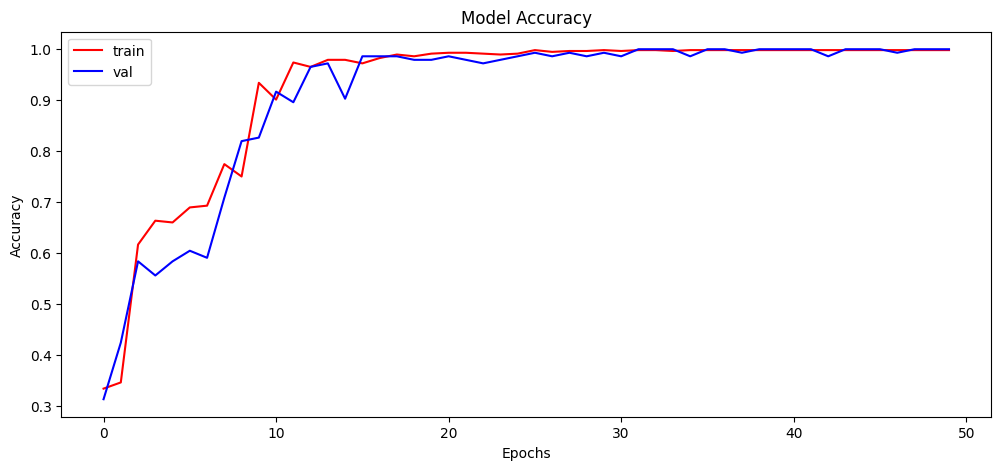

In [22]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Next i will plot the accuracy of the model for the trainig history.

In [23]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 42ms/step - loss: 0.0309 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


Evaluating the model to know the accuracy of the model.


In [24]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


Next i will use my model to predict predicting the testing dataset label.

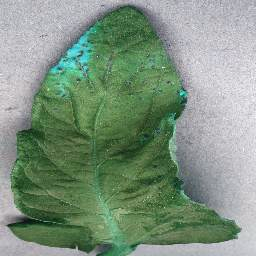

In [25]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [26]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [27]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[5])])
print("Predicted : ",all_labels[np.argmax(y_pred[5])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


Printing out the original and the predicted label.

## Conclusion

I started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that i created a CNN Model which is further used for predicting the plant diseases using the image supplied to model.
This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.